In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("crime_data.csv")

In [3]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
df.shape

(50, 5)

In [5]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

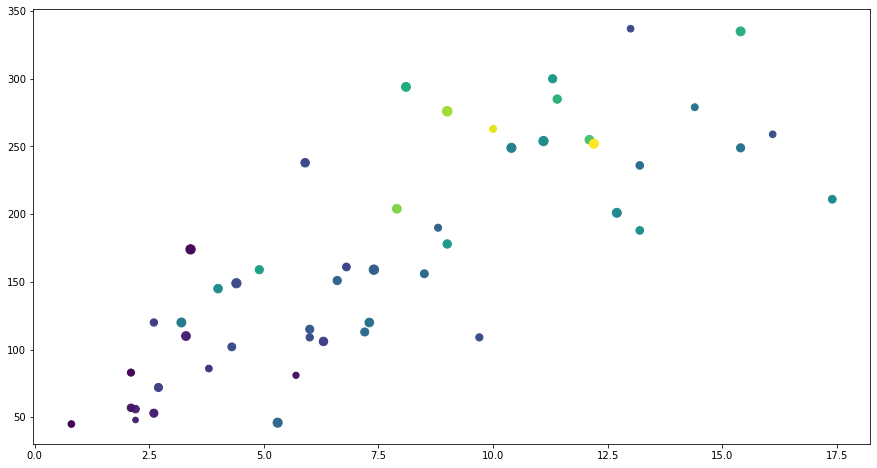

In [6]:
plt.figure(figsize= (15,8))
plt.scatter(df.Murder, df.Assault, df.UrbanPop, df.Rape)
plt.show

In [7]:
## direct k means model without find best k values
from sklearn.cluster import KMeans

In [8]:
km = KMeans(n_clusters=6)

In [9]:
pred = km.fit_predict(df[['Murder','Assault', 'UrbanPop', 'Rape']])

In [10]:
pred

array([1, 1, 3, 4, 1, 4, 5, 1, 3, 4, 2, 5, 1, 5, 2, 5, 5, 1, 2, 3, 0, 1,
       2, 1, 4, 5, 5, 1, 2, 0, 1, 1, 3, 2, 5, 0, 0, 5, 0, 1, 2, 4, 4, 5,
       2, 0, 0, 2, 2, 0])

## clustring with normalization data


In [11]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [12]:
def norm(i):
    x = (i-i.min()) / (i.max() - i.min())
    return x

In [13]:
norm_data = norm(df.iloc[:, 1:])

In [14]:
norm_data.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [15]:
## now again grouping the datas
k = KMeans(n_clusters=6)
k

KMeans(n_clusters=6)

In [16]:
pred = k.fit_predict(norm_data[['Murder','Assault', 'UrbanPop', 'Rape']])
pred

array([0, 2, 5, 4, 2, 2, 3, 4, 5, 0, 3, 1, 5, 4, 1, 4, 4, 0, 1, 5, 3, 2,
       1, 0, 4, 1, 1, 2, 1, 3, 5, 5, 0, 1, 3, 4, 4, 3, 3, 0, 1, 0, 5, 3,
       1, 4, 3, 1, 1, 4])

In [17]:
norm_data['cluster2'] = pred

In [18]:
norm = norm_data

## Visualization cluster

In [19]:
df1 = norm_data[norm_data.cluster2 == 0]
df2 = norm_data[norm_data.cluster2 == 1]
df3 = norm_data[norm_data.cluster2 == 2]
df4 = norm_data[norm_data.cluster2 == 3]
df5 = norm_data[norm_data.cluster2 == 4]
df6 = norm_data[norm_data.cluster2 == 5]

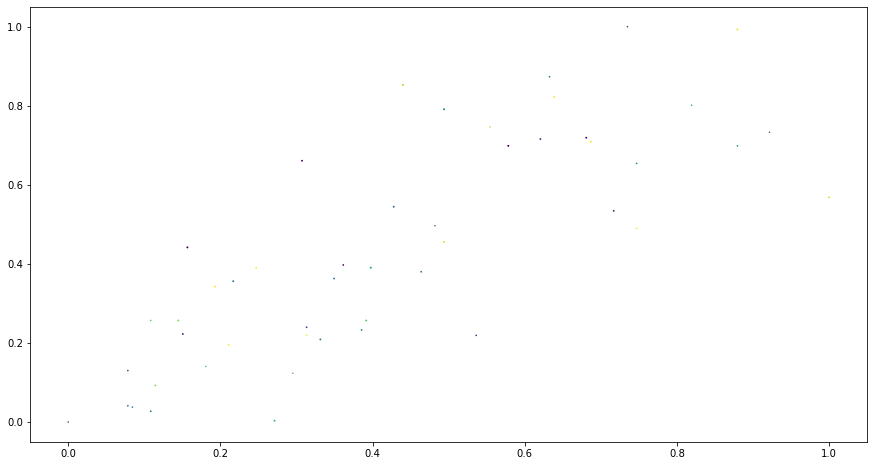

In [32]:
plt.figure(figsize= (15,8))
plt.scatter(df1['Murder'], df1['Assault'], df1['UrbanPop'], df1['Rape'])
plt.scatter(df2['Murder'], df2['Assault'], df2['UrbanPop'], df2['Rape'])
plt.scatter(df3['Murder'], df3['Assault'], df3['UrbanPop'], df3['Rape'])
plt.scatter(df4['Murder'], df4['Assault'], df4['UrbanPop'], df4['Rape'])
plt.scatter(df5['Murder'], df5['Assault'], df5['UrbanPop'], df5['Rape'])
plt.scatter(df6['Murder'], df6['Assault'], df6['UrbanPop'], df6['Rape'])

In [21]:
## centroid numbers
k.cluster_centers_

array([[0.83562823, 0.70645793, 0.37772397, 0.37172388],
       [0.13805221, 0.10616438, 0.34039548, 0.1171404 ],
       [0.5686747 , 0.70205479, 0.71864407, 0.87028424],
       [0.25033467, 0.27549467, 0.81544256, 0.27103072],
       [0.3939759 , 0.38356164, 0.53050847, 0.33953488],
       [0.64371773, 0.78424658, 0.77966102, 0.54374308]])

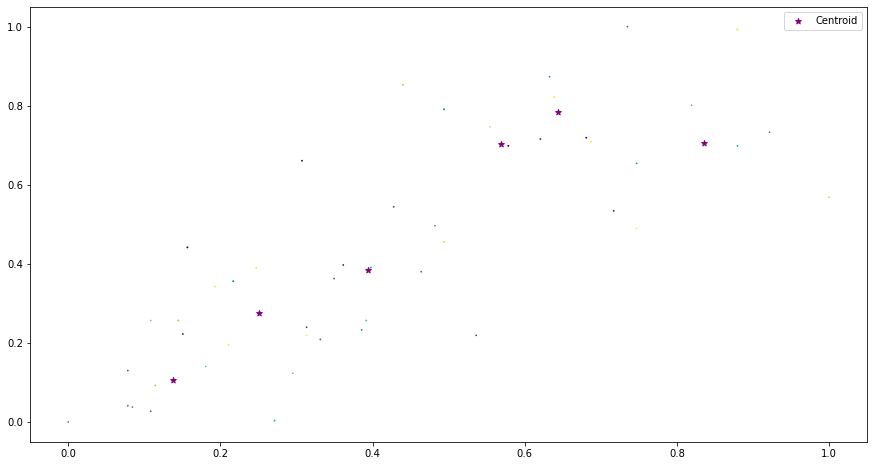

In [22]:
plt.figure(figsize= (15,8))
plt.scatter(df1['Murder'], df1['Assault'], df1['UrbanPop'], df1['Rape'])
plt.scatter(df2['Murder'], df2['Assault'], df2['UrbanPop'], df2['Rape'])
plt.scatter(df3['Murder'], df3['Assault'], df3['UrbanPop'], df3['Rape'])
plt.scatter(df4['Murder'], df4['Assault'], df4['UrbanPop'], df4['Rape'])
plt.scatter(df5['Murder'], df5['Assault'], df5['UrbanPop'], df5['Rape'])
plt.scatter(df6['Murder'], df6['Assault'], df6['UrbanPop'], df6['Rape'])
plt.scatter(k.cluster_centers_[:,0], k.cluster_centers_[:,1], marker='*', color='purple', label='Centroid')
plt.legend()

In [28]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Univ_df = scaler.fit_transform(df.iloc[:,1:])

In [29]:
wcss = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i, random_state=0)
    kmean.fit(scaled_Univ_df)
    wcss.append(kmean.inertia_)

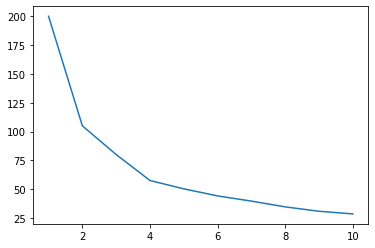

In [30]:
plt.plot(range(1, 11), wcss)

## again bulid the model after found K values

In [33]:
from sklearn.cluster import KMeans

In [34]:
model = KMeans(n_clusters=4)

In [38]:
model.fit_predict(scaled_Univ_df)

array([0, 3, 3, 0, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1, 3,
       2, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 2, 1])

In [39]:
model.cluster_centers_

array([[ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383]])